<a href="https://colab.research.google.com/github/gyujin0450/RPRG_PartII/blob/master/p194_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B%EB%B3%B4%EA%B8%B0_%EA%B2%B0%EC%B8%A1%EC%B9%98%EC%B2%98%EB%A6%AC%EB%93%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch7.2 수집자료 이해

In [1]:
dataset <- read.csv("dataset.csv", header = T)
head(dataset,5)

,resident,gender,job,age,position,price,survey
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,1,1,1,26,2,5.1,1
2,2,1,2,54,5,4.2,2
3,NA,1,2,41,4,4.7,4
4,4,2,NA,45,4,3.5,2
5,5,1,3,62,5,5.0,1


In [2]:
print(dataset) # 콘솔창에 전체 데이터 출력

    resident gender job age position  price survey
1          1      1   1  26        2    5.1      1
2          2      1   2  54        5    4.2      2
3         NA      1   2  41        4    4.7      4
4          4      2  NA  45        4    3.5      2
5          5      1   3  62        5    5.0      1
6          3      1   2  57       NA    5.4      2
7          2      2   1  36        3    4.1      4
8          5      1   2  NA        3  675.0      4
9         NA      1   1  56        5    4.4      3
10         2      1   2  37        3    4.9      3
11         5      2  NA  29        2    2.3      5
12         3      1   3  35        2    4.2      3
13         1      1   1  56        5    6.7      2
14         2      2   3  20        1    4.3      2
15        NA      1   2  63       NA  257.8      2
16         1      1   1  49        4    5.7      2
17         3      1   2  49        4    4.6      1
18         2      1   3  49        4    5.1      2
19         1      2   2  25    

In [4]:
# View(dataset) 
# Error in View(dataset): ‘View()’ not yet supported in the Jupyter R kernel
# R Studio에서 조회 가능

In [5]:
# 데이터셋 구조 보기
str(dataset)

'data.frame':	300 obs. of  7 variables:
 $ resident: int  1 2 NA 4 5 3 2 5 NA 2 ...
 $ gender  : int  1 1 1 2 1 1 2 1 1 1 ...
 $ job     : int  1 2 2 NA 3 2 1 2 1 2 ...
 $ age     : int  26 54 41 45 62 57 36 NA 56 37 ...
 $ position: int  2 5 4 4 5 NA 3 3 5 3 ...
 $ price   : num  5.1 4.2 4.7 3.5 5 5.4 4.1 675 4.4 4.9 ...
 $ survey  : int  1 2 4 2 1 2 4 4 3 3 ...


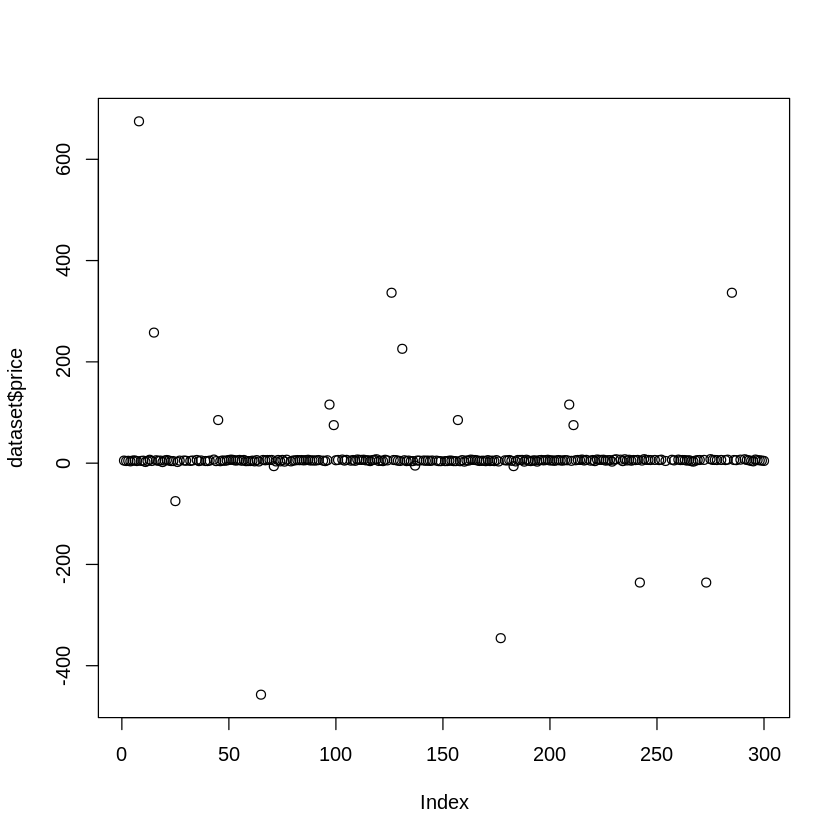

In [7]:
# 데이터셋 조회
plot(dataset$price)

In [9]:
dataset[c(100:110),]

,resident,gender,job,age,position,price,survey
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
100,5,2,2,43,4,5.7,3
101,1,2,3,NA,3,6.3,4
102,2,1,3,63,5,NA,2
103,1,1,NA,47,4,7.1,2
104,5,2,3,45,4,5.0,2
105,1,2,1,44,4,6.5,2
106,5,1,3,NA,5,NA,3
107,3,2,2,27,2,4.9,3
108,1,1,3,37,3,6.2,3


Ch06.3 결측치 처리

In [ ]:
# 분석가가 데이터를 코딩하는 과정에서 실수로 입력하지 않았거나, 응답자가 고의로 응답을 회피한 경우
# 결측치(Missing Values, R에서는 NA로 표기)가 발생함.
# 이 경우 결측치 항목의 최대 자리수 만큼 숫자 9를 채워 부호화하거나 하이픈(-)으로 해당 항목을 채워 넣는다. 

In [10]:
# 결측치 확인
summary(dataset)

    resident         gender          job             age           position    
 Min.   :1.000   Min.   :0.00   Min.   :1.000   Min.   :20.00   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.00   1st Qu.:1.000   1st Qu.:29.00   1st Qu.:2.000  
 Median :2.000   Median :1.00   Median :2.000   Median :44.00   Median :4.000  
 Mean   :2.233   Mean   :1.42   Mean   :2.118   Mean   :43.31   Mean   :3.404  
 3rd Qu.:3.000   3rd Qu.:2.00   3rd Qu.:3.000   3rd Qu.:57.00   3rd Qu.:5.000  
 Max.   :5.000   Max.   :5.00   Max.   :3.000   Max.   :69.00   Max.   :5.000  
 NA's   :21                     NA's   :13      NA's   :31      NA's   :23     
     price              survey     
 Min.   :-457.200   Min.   :1.000  
 1st Qu.:   4.425   1st Qu.:2.000  
 Median :   5.400   Median :3.000  
 Mean   :   8.752   Mean   :2.657  
 3rd Qu.:   6.300   3rd Qu.:3.000  
 Max.   : 675.000   Max.   :5.000  
 NA's   :30                        

In [11]:
summary(dataset$job)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.000   1.000   2.000   2.118   3.000   3.000      13 

In [12]:
sum(dataset$price)

[1] NA

In [13]:
# 결측치 제거 : 무조건 결측치를 제거하면 중요한 데이터가 소실될 수도 있음
# 일반적으로 기계학습시 많은 데이터를 사용할 경우 결측치로 왜곡이 생길 수 있어 제거함 
sum(dataset$price, na.rm = T)

[1] 2362.9

In [14]:
price2 <- na.omit(dataset$price)
sum(price2)

[1] 2362.9

In [15]:
length(price2) # 결측치 30개 제거

[1] 270

In [16]:
str(price2)

 num [1:270] 5.1 4.2 4.7 3.5 5 5.4 4.1 675 4.4 4.9 ...
 - attr(*, "na.action")= 'omit' int [1:30] 28 31 34 38 42 78 93 98 102 106 ...


In [20]:
# 결측치 대체 : 결측치를 0 이나 평균값으로 대체 함
dataset2 <- dataset
dataset2$price <- ifelse(is.na(dataset$price),0,dataset$price)
summary(dataset2$price)
mean(dataset2$price,2)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-457.200    4.000    5.200    7.876    6.200  675.000 

[1] 5.2

In [22]:
dataset3 <- dataset
dataset3$price <- ifelse(is.na(dataset$price),round(mean(dataset$price, na.rm =T),2),dataset$price)
summary(dataset3$price)
mean(dataset3$price,2)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-457.200    4.700    5.700    8.751    6.500  675.000 

[1] 5.7

In [24]:
# 결측치 대체 결과, 평균이 달라지는 현상에 대한 조치는?
mean(dataset$price, na.rm =T)

[1] 8.751481

In [33]:
dataset4 <- matrix(c(dataset$price,dataset2$price,dataset3$price), ncol = 3, byrow = F)
dataset4[c(100:110),]

5.7,5.7,5.70
6.3,6.3,6.30
NA,0.0,8.75
7.1,7.1,7.10
5.0,5.0,5.00
6.5,6.5,6.50
NA,0.0,8.75
4.9,4.9,4.90
6.2,6.2,6.20
4.6,4.6,4.60
7.2,7.2,7.20
